## Calculo de integrales numericas con SciPy

Como siempre lo primero es lo primero, **importemos** los paquetes que vamos a utilizar:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## scipy.integrate

Este subpaquete de ```SciPy``` proporciona algunas **tecnicas de integracion tanto de funciones como de ecuaciones diferenciales.** En primer lugar importemoslo y ejecutemos la ayuda para ver cuales son estas funciones

In [2]:
# Importemos el paquete integrate
from scipy import integrate

# Help del paquete integrate
help(integrate)

Help on package scipy.integrate in scipy:

NAME
    scipy.integrate

DESCRIPTION
    Integration and ODEs (:mod:`scipy.integrate`)
    
    .. currentmodule:: scipy.integrate
    
    Integrating functions, given function object
    
    .. autosummary::
       :toctree: generated/
    
       quad          -- General purpose integration
       quad_vec      -- General purpose integration of vector-valued functions
       dblquad       -- General purpose double integration
       tplquad       -- General purpose triple integration
       nquad         -- General purpose N-D integration
       fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
       quadrature    -- Integrate with given tolerance using Gaussian quadrature
       romberg       -- Integrate func using Romberg integration
       quad_explain  -- Print information for use of quad
       newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
       IntegrationWarning -- Warning on i

## quad

Como se puede ver en la ayuda, si queremos realizar una *integracion numerica* de una funcion de una variable, debemos utilizar ```quad``` (aunque tambien podemos usar ```trapz```, ```simps...```  
La forma de acceder a ella tal y como hemos importado el paquete seria eejecutando ```integrate.quad```. Sin embargo, seria mas normal impoortar del siguiente modo:

In [3]:
from scipy.integrate import quad

De este modo se puede usar la funcion quad, simplemente como ```quad```. Pero todavia no sabemos como funciona, ¿te atreves a investigarlo tu?

In [4]:
help(quad)

Help on function quad in module scipy.integrate.quadpack:

quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)
    Compute a definite integral.
    
    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.
    
    Parameters
    ----------
    func : {function, scipy.LowLevelCallable}
        A Python function or method to integrate. If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.
    
        If the user desires improved integration performance, then `f` may
        be a `scipy.LowLevelCallable` with one of the signatures::
    
            double func(double x)
            double func(double x, void *user_data)
            double func(int n, double *xx)
            double func(int n, double *xx, void *user_data)
    
        The ``user_data`` is the d

Ahora definimos la funcion de interes:
$$f(x) = x \cdot sin(x)$$

In [5]:
def fun(x):
    return x * np.sin(x)

## Ejercicio

In [6]:
# Generar la x y la y
x = np.linspace(0, 10, 100)
y = fun(x)

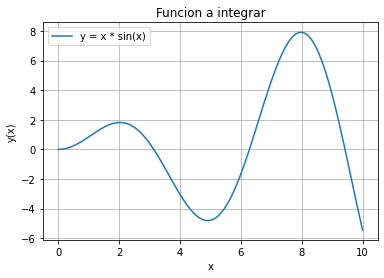

In [7]:
# Antes de integrarla generamos esta grafica:
plt.plot(x, y, label=r'y = x * sin(x)')
plt.ylabel('y(x)')
plt.xlabel('x')
plt.title('Funcion a integrar')
plt.legend(loc='best')
plt.grid()
plt.show()

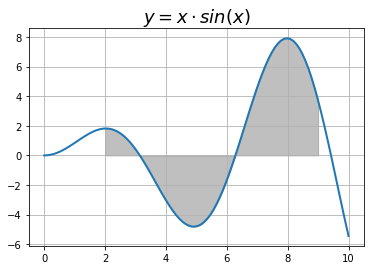

In [8]:
# Titulo
plt.title('$y = x \cdot sin(x)$', fontsize = 18)

# Pintando la linea
plt.plot(x, y, linewidth=2)

# Pintando el relleno
x_fill = np.linspace(2, 9, 100)
y_fill = fun(x_fill)
plt.fill_between(x_fill, y_fill, color='gray', alpha=0.5)

# Poniendo la cuadricula
plt.grid()

plt.show()

### Ahora integremos con ```quad```

**Integremos** la funcion en el intervalo [2, 9].  
Recuerda que esto te calcula la integral, *no el area*:

In [10]:
value, err = quad(fun, 2, 9)
print("El resultado es:", value, "con un error de:", err)

El resultado es: 6.870699742283883 con un error de: 2.864870105641461e-13


### Simpson y trapecio

Segun la figura en la docuemntacion a estos metodos hay que pasarles las coordenadas de los puntos (no la funcion). Esto puede ser util si no disponemos de una funcion, sino de una serie de valores, que por ejemplo, provienen de un experimento.

In [11]:
I1, err1 = quad(fun, 2, 3.1)
I2, err2 = quad(fun, 3.1, 6.2)
print(I2)
I3, err3 = quad(fun, 6.2, 9)
IT = I1 + I2 + I3
errT = np.sqrt(err1**2 + err2**2 + err3**2)
print("El resultado es:", IT, "con un error de:", errT)

-9.400550032641902
El resultado es: 6.870699742283879 con un error de: 1.9638518519381637e-13


In [12]:
x = np.linspace(2, 9, 100)

In [14]:
%%time
value, err = quad(fun, 2, 9)
print("El resultado es:", value)

El resultado es: 6.870699742283883
CPU times: user 111 µs, sys: 87 µs, total: 198 µs
Wall time: 185 µs


In [17]:
%%time
value = integrate.trapz(fun(x), x)
print("El resultado es:", value)

El resultado es: 6.867422661707985
CPU times: user 128 µs, sys: 99 µs, total: 227 µs
Wall time: 190 µs


In [19]:
%%time
x = np.linspace(2, 9, 100)
value = integrate.simps(fun(x), x)
print("El resultado es: ", value)

El resultado es:  6.870575909500407
CPU times: user 277 µs, sys: 214 µs, total: 491 µs
Wall time: 369 µs
